# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula,faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
# Fixing random state for reproducibility
np.random.seed(2360873)
N = 100

In [14]:
path = r"C:\Users\wilma\OneDrive\Área de Trabalho\Cientista de dados M10\previsao_de_renda.csv"
previsao_de_renda = pd.read_csv(path)

In [15]:
# garantir renda numérica
df['renda'] = pd.to_numeric(df['renda'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False), errors='coerce')
df = df.dropna(subset=['renda']).copy()

# garantir variáveis qualitativas em formato categórico / binário
for col in ['posse_de_imovel', 'posse_de_veiculo']:
    if col in df.columns:
        # se for booleano, converter para int; se for texto, transformar em category
        if df[col].dtype == 'bool':
            df[col] = df[col].astype(int)
        else:
            df[col] = df[col].astype('category')


In [16]:
for col in ['posse_de_imovel','posse_de_veiculo']:
    if col in df.columns:
        print(f"\nFrequências - {col}:")
        print(df[col].value_counts(dropna=False))
        print("\nProporções:")
        print(df[col].value_counts(normalize=True, dropna=False).round(3))


Frequências - posse_de_imovel:
posse_de_imovel
1    10082
0     4918
Name: count, dtype: int64

Proporções:
posse_de_imovel
1    0.672
0    0.328
Name: proportion, dtype: float64

Frequências - posse_de_veiculo:
posse_de_veiculo
0    9167
1    5833
Name: count, dtype: int64

Proporções:
posse_de_veiculo
0    0.611
1    0.389
Name: proportion, dtype: float64


In [18]:
# Função que aplica t-test (Welch) e Mann-Whitney (não paramétrico) entre grupos binários
def compare_groups(var):
    print(f"\n=== Testes para {var} ===")
    # se variável for categórica com mais de 2 níveis, faz ANOVA/Kruskal-Wallis
    levels = df[var].dropna().unique()
    groups = [df.loc[df[var]==lvl, 'renda'] for lvl in levels]

    if len(levels) == 2:
        g0, g1 = groups
        print("N (level0):", len(g0), "N (level1):", len(g1))
        tstat, p_t = stats.ttest_ind(g1, g0, equal_var=False, nan_policy='omit')
        print("t-test (Welch) p-value:", round(p_t,6))
        ustat, p_u = stats.mannwhitneyu(g1, g0, alternative='two-sided')
        print("Mann-Whitney p-value:", round(p_u,6))
    else:
        # ANOVA
        fstat, p_anova = stats.f_oneway(*groups)
        print("ANOVA p-value:", round(p_anova,6))
        # Kruskal-Wallis
        hstat, p_kw = stats.kruskal(*groups)
        print("Kruskal-Wallis p-value:", round(p_kw,6))

for v in ['posse_de_imovel','posse_de_veiculo']:
    if v in df.columns:
        compare_groups(v)


=== Testes para posse_de_imovel ===
N (level0): 10082 N (level1): 4918
t-test (Welch) p-value: 1.6e-05
Mann-Whitney p-value: 0.0

=== Testes para posse_de_veiculo ===
N (level0): 9167 N (level1): 5833
t-test (Welch) p-value: 0.0
Mann-Whitney p-value: 0.0


In [19]:
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    pooled_sd = np.sqrt(((nx-1)*x.std(ddof=1)**2 + (ny-1)*y.std(ddof=1)**2) / dof)
    return (x.mean() - y.mean()) / pooled_sd

for col in ['posse_de_imovel','posse_de_veiculo']:
    if col in df.columns:
        levels = sorted(df[col].dropna().unique())
        if len(levels)==2:
            a = df.loc[df[col]==levels[1], 'renda']
            b = df.loc[df[col]==levels[0], 'renda']
            print(f"\n{col} Cohen's d (level {levels[1]} vs {levels[0]}): {cohens_d(a,b):.3f}")
        # point-biserial (se binária)
        if df[col].nunique() == 2:
            pb_r, pb_p = stats.pointbiserialr(df[col].astype(int), df['renda'])
            print(f"{col} point-biserial r = {pb_r:.3f}, p = {pb_p:.6f}")


posse_de_imovel Cohen's d (level 1 vs 0): 0.074
posse_de_imovel point-biserial r = 0.035, p = 0.000023

posse_de_veiculo Cohen's d (level 1 vs 0): 0.113
posse_de_veiculo point-biserial r = 0.055, p = 0.000000


C:\Users\wilma\AppData\Local\Temp\ipykernel_30348\3767684332.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x=df[col].astype(str), y=df['renda'], hue=df[hue] if hue in df.columns else None,
C:\Users\wilma\AppData\Local\Temp\ipykernel_30348\3767684332.py:24: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(x=df[col].astype(str), y=df['renda'], hue=df[hue] if hue in df.columns else None,


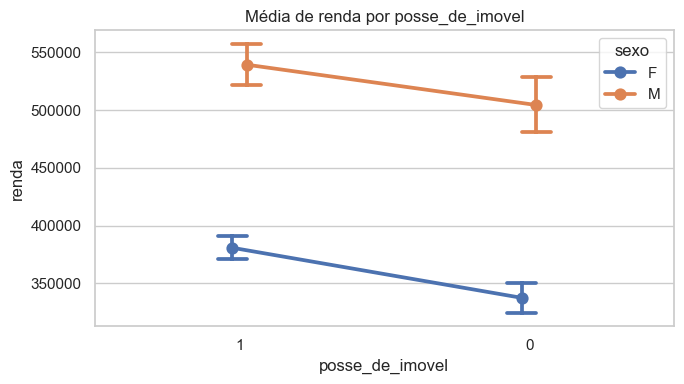

C:\Users\wilma\AppData\Local\Temp\ipykernel_30348\3767684332.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x=df[col].astype(str), y=df['renda'], hue=df[hue] if hue in df.columns else None,
C:\Users\wilma\AppData\Local\Temp\ipykernel_30348\3767684332.py:24: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(x=df[col].astype(str), y=df['renda'], hue=df[hue] if hue in df.columns else None,


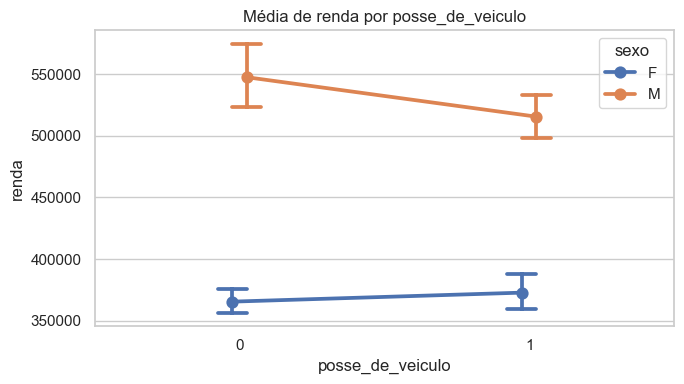

In [21]:
df['renda'] = pd.to_numeric(df['renda'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False), errors='coerce')
df = df.dropna(subset=['renda']).copy()

# garantir colunas binárias 0/1
for col in ['posse_de_imovel','posse_de_veiculo']:
    if col in df.columns:
        if df[col].dtype == 'bool':
            df[col] = df[col].astype(int)
        else:
            # mapear valores comuns para 0/1; se já for 0/1, mantém
            df[col] = df[col].map({True:1, False:0, 'True':1, 'False':0, 'SIM':1, 'Sim':1, 'sim':1, 'NAO':0, 'Nao':0, 'não':0}).fillna(df[col])
            if df[col].dtype.name == 'category' or df[col].dtype == object:
                # se ainda não for numérico e tiver 2 níveis, codifica
                if df[col].nunique() == 2:
                    df[col] = pd.Categorical(df[col]).codes

# função para plotar pointplot com e sem hue
def plot_point(col, hue=None):
    if col not in df.columns:
        return
    plt.figure(figsize=(7,4))
    sns.pointplot(x=df[col].astype(str), y=df['renda'], hue=df[hue] if hue in df.columns else None,
                  estimator=np.mean, ci=95, dodge=True, join=True, capsize=0.1)
    plt.title(f"Média de renda por {col}")
    plt.xlabel(col)
    plt.ylabel("renda")
    plt.tight_layout()
    plt.show()


plot_point('posse_de_imovel', hue='sexo')
plot_point('posse_de_veiculo', hue='sexo')

   ## Posse de imóvel
    Padrão visível: para ambos os sexos, a média de renda é maior quando a pessoa possui imóvel (ponto em 1 > ponto em 0). Além disso, homens (M) apresentam média de renda superior às mulheres (F) em ambas as categorias (com e sem imóvel).Portanto, o gráfico sugere que posse de imóvel está associada a renda maior, e que há diferença por sexo, mas não prova estatisticamente essa associação.

 ## Posse de veículo
    Gráfico mostra a média de renda por status de posse de veículo (0 = não, 1 = sim), separada por sexo. Para ambos os sexos, a média de renda é maior quando há posse de veículo; homens têm médias maiores que mulheres em ambos os grupos. As barras verticais representam intervalos de confiança da média (normalmente 95%).

    • Direção da associação: possuir veículo está associado a média de renda mais alta.
    • Diferença por sexo: homens apresentam média de renda superior às mulheres tanto entre os que têm veículo quanto entre os que não têm.

 

     Conclusão, com base nesses números: não, posse de imóvel e posse de veículo não são boas preditoras de renda por si só. Elas mostram associação estatisticamente detectável, mas o efeito é tão pequeno que tem pouco valor prático para prever renda isoladamente. Em termos práticos, saber apenas se alguém tem imóvel ou carro não fornece informação útil para estimar sua renda com precisão.
     Sozinhas: posse_de_imovel e posse_de_veiculo não são bons preditores isolados.Em conjunto com outras variáveis: podem trazer pequeno ganho marginal quando combinadas com controles fortes (idade, educação, tempo de emprego, tipo_renda etc.), mas é provável que o aumento de desempenho seja muito pequeno.


In [22]:
# médias e tamanhos
print(df.groupby(['posse_de_veiculo','sexo'])['renda'].agg(['count','mean','std']).round(2))

# t-test Welch entre posse 1 vs 0 (por sexo)
from scipy import stats
for s in df['sexo'].unique():
    g1 = df[(df['posse_de_veiculo']==1)&(df['sexo']==s)]['renda']
    g0 = df[(df['posse_de_veiculo']==0)&(df['sexo']==s)]['renda']
    t,p = stats.ttest_ind(g1, g0, equal_var=False, nan_policy='omit')
    print(s, 't-test p=', p)

# Cohen's d (magnitude)
def cohens_d(a,b):
    nx, ny = len(a), len(b)
    pooled = (((nx-1)*a.std(ddof=1)**2 + (ny-1)*b.std(ddof=1)**2) / (nx+ny-2))**0.5
    return (a.mean()-b.mean())/pooled
for s in df['sexo'].unique():
    a = df[(df['posse_de_veiculo']==1)&(df['sexo']==s)]['renda']
    b = df[(df['posse_de_veiculo']==0)&(df['sexo']==s)]['renda']
    print(s, "Cohen's d =", round(cohens_d(a,b),3))

                       count       mean        std
posse_de_veiculo sexo                             
0                F      7489  365384.90  412371.44
                 M      1678  547680.77  537837.31
1                F      2678  372700.06  399987.06
                 M      3155  515635.67  506271.31
F t-test p= 0.4205004525753099
M t-test p= 0.04428551276659763
F Cohen's d = 0.018
M Cohen's d = -0.062


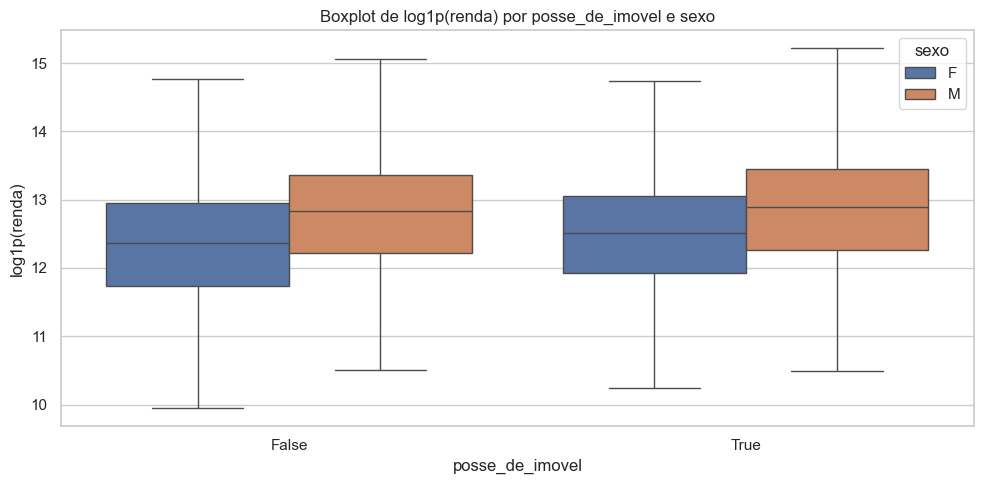

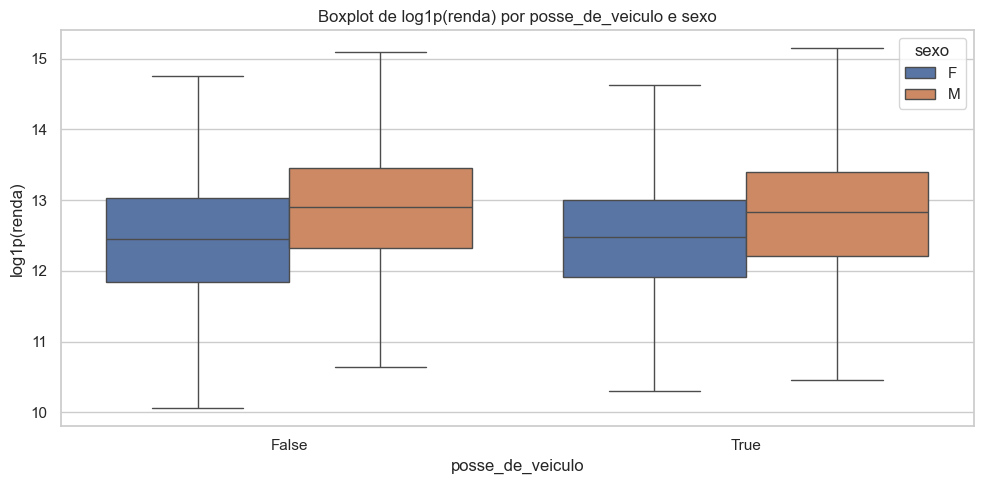

In [33]:
# transformar
df['log_renda'] = np.log1p(df['renda'])

# configurar estilo
sns.set(style="whitegrid")

# 1) Boxplot de log_renda por posse_de_imovel com hue por sexo
plt.figure(figsize=(10,5))
sns.boxplot(x='posse_de_imovel', y='log_renda', hue='sexo', data=df, showfliers=False)
plt.title('Boxplot de log1p(renda) por posse_de_imovel e sexo')
plt.xlabel('posse_de_imovel')
plt.ylabel('log1p(renda)')
plt.legend(title='sexo')
plt.tight_layout()
plt.show()


# 3) Boxplot/Violin para posse_de_veiculo (mesma lógica)
plt.figure(figsize=(10,5))
sns.boxplot(x='posse_de_veiculo', y='log_renda', hue='sexo', data=df, showfliers=False)
plt.title('Boxplot de log1p(renda) por posse_de_veiculo e sexo')
plt.xlabel('posse_de_veiculo')
plt.ylabel('log1p(renda)')
plt.tight_layout()
plt.show()

